# 1. Using Naive Python T-SNE and matplotlib approach

# 2. Using TensorBoard -
All thanks to Chiranjeevi Vegi's Blog on Medium - https://medium.com/@vegi/visualizing-higher-dimensional-data-using-t-sne-on-tensorboard-7dbf22682cf2

### 1. T-SNE and matplotlib

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
def tsne_plot(data,meta_data):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for vec,lbl in zip(data,meta_data):
        tokens.append(vec)
        labels.append(lbl)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16))
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [3]:
with open("ques_matrix.pickle","rb") as fh:
    ques_matrix = pickle.load(fh)

In [4]:
with open("imgs_matrix.pickle","rb") as fh:
    imgs_matrix = pickle.load(fh)

In [5]:
with open("meta_ques.pickle","rb") as fh:
    meta_ques = pickle.load(fh)

In [17]:
meta_info =''
for ques in meta_ques[:100]:
    meta_info += ques + '\t'
    
with open("project-tensorboard\log-1\df_ques_labels.tsv",'w',encoding='utf8') as fh:
    fh.write(meta_info)
    

In [7]:
with open("meta_imgs.pickle","rb") as fh:
    meta_imgs = pickle.load(fh)

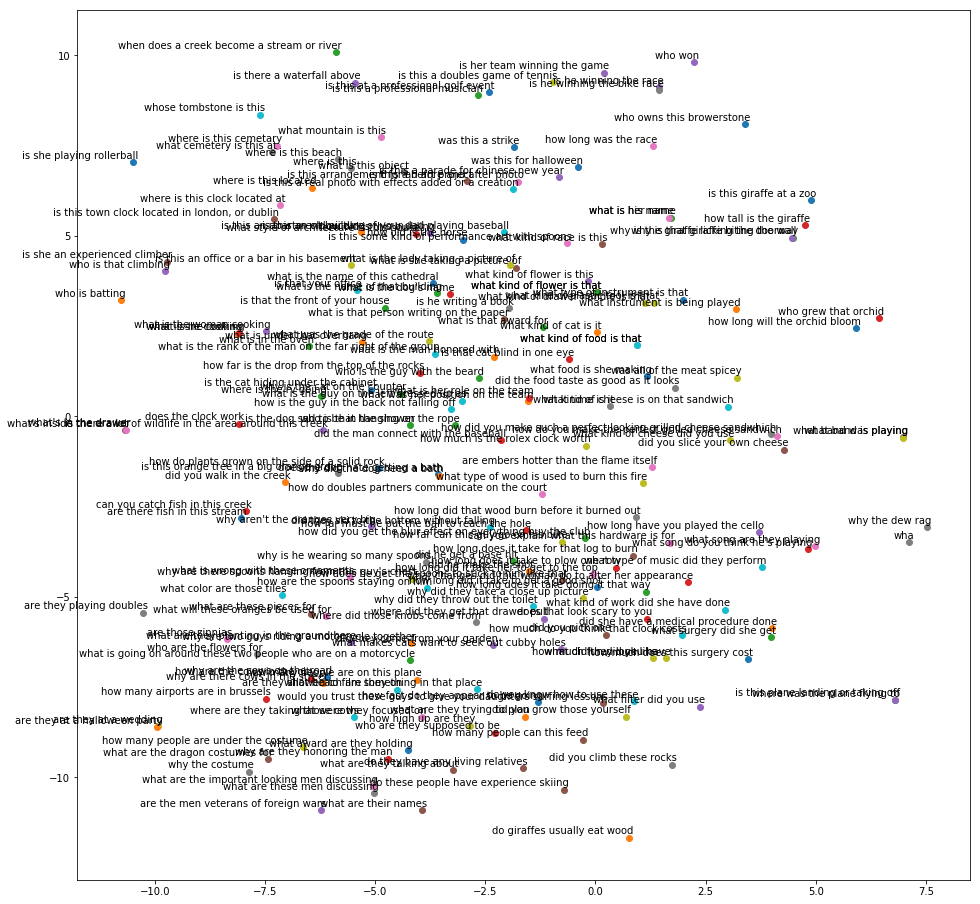

In [9]:
tsne_plot(ques_matrix[:200],meta_ques[:200])

In [ ]:
tsne_plot(img_matrix[:100],meta_imgs[:100])

# 2. Using TensorBoard



## Importing required Libraries

In [8]:

import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\kmura\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Get working directory

In [9]:
PATH = os.getcwd()


## Path to save the embedding and checkpoints generated

In [10]:

LOG_DIR = PATH + '/project-tensorboard/log-1/'

In [ ]:
LOG_DIR

## Load data

In [ ]:

# df = pd.read_csv("scaled_data.csv",index_col =0)

## Load the metadata file. Metadata consists your labels. This is optional. Metadata helps us visualize(color) different clusters that form t-SNE


In [11]:
metadata = os.path.join(LOG_DIR, 'df_ques_labels.tsv')


# Generating PCA and 

In [18]:


pca = PCA(n_components=50,
         random_state = 123,
         svd_solver = 'auto'
         )
df_pca = pd.DataFrame(pca.fit_transform(ques_matrix[:100]))
df_pca = df_pca.values

In [19]:





## TensorFlow Variable from data
tf_data = tf.Variable(df_pca)

## Running TensorFlow Session
with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf_data.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
# One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    # Link this tensor to its metadata(Labels) file
    embedding.metadata_path = metadata
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)